In [3]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest as IF
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from torchvision import datasets
from sklearn.metrics import f1_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay, average_precision_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [10]:
def plot_conf_mat(label, pred):
    font = {'family' : 'normal', 'weight' : 'bold', 'size'   : 20}
    plt.rc('font', **font)
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(label, pred),display_labels=['frauds', 'normal'])
    disp.plot(colorbar=False)
    plt.show()

In [5]:
train = pd.read_csv('cc_test.csv')
Y = train.get('Class')
Y=Y.replace(1,-1)
Y=Y.replace(0,1)
X = train.drop('Class', axis=1)
cont=Y.value_counts()
cont=cont[-1]/cont[1]
cont

0.0018835410571875126

In [ ]:
model = IF(random_state=47)

param_grid = {'n_estimators': [1000, 1500], 
              'max_samples': [10], 
              'contamination': ['auto', 0.0001, 0.0002], 
              'max_features': [10, 15], 
              'bootstrap': [True], 
              'n_jobs': [-1]}

grid_search = GridSearchCV(model, 
    param_grid,
    scoring="neg_mean_squared_error", 
    refit=True,
    cv=10, 
    return_train_score=True
)
best_model = grid_search.fit(X, Y)

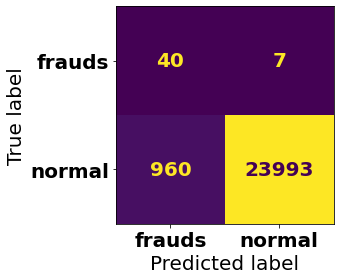

In [11]:
clf = IF(random_state=1,contamination=0.04,n_estimators=88, max_samples=len(X), max_features=20, n_jobs=-1)
predictY = clf.fit_predict(X)
plot_conf_mat(Y, predictY)

In [ ]:
# precision, recall, thresholds=precision_recall_curve(Y, abs(clf.score_samples(X)), pos_label=predictY)
average_precision_score(Y, clf.decision_function(X), pos_label=-1)

0.000980664056784179

In [ ]:
true_pos = len(
    [x for x in range(len(predictY)) if (predictY[x]==-1 and Y[x] == -1)]
)
false_pos = len(
    [x for x in range(len(predictY)) if (predictY[x]==-1 and Y[x] == 1)]
)
true_neg = len(
    [x for x in range(len(predictY)) if (predictY[x]==1 and Y[x] == 1)]
)
false_neg = len(
    [x for x in range(len(predictY)) if (predictY[x]==1 and Y[x] == -1)]
)
true_neg, true_pos, false_neg, false_pos


(23993, 40, 7, 960)

In [ ]:
#F1-score

recall = true_pos/(true_pos+false_neg)
precision = true_pos/(true_pos+false_pos)
accurracy = (true_pos+true_neg)/len(predictY)

2*precision*recall/(precision+recall), precision, recall, accurracy


(0.0764087870105062, 0.04, 0.851063829787234, 0.96132)